In [2]:
###General Code First Box
import pandas as pd
import numpy as np
import scanpy as sc
import magpy as mp
import scipy.stats as stats
import os
import math
import anndata as ad
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

def sort_list_by_pctexp(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    pctexp = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        pctexp[i] = (subset2.layers['raw_normalized']>0).sum(axis=0).A1 / subset.shape[0]
    subset.var['pctmax'] = pctexp.max(axis=0)
    sorted_list = subset.var['pctmax'].sort_values(ascending=False).index.tolist()
    return sorted_list
def sort_list_by_mean(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[i] = subset2.layers['raw_normalized'].mean(axis=0).A1
    subset.var['cmeans'] = cmeans.max(axis=0)
    sorted_list = subset.var['cmeans'].sort_values(ascending=False).index.tolist()
    return sorted_list
def means_to_df(adata, gene_list, save=None, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = {}
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[cluster] = subset2.layers['raw_normalized'].mean(axis=0).A1
    df = pd.DataFrame(cmeans,index=gene_list)
    if save: df.to_csv(save)
    return df

combined_path = "/proj/magness/CDS010-014-015_combined"

# sc.set_figure_params(dpi_save = 300, format = 'svg')
fig_path = combined_path+'fig12/'
sc.settings.figdir = fig_path
plt.rcParams ['figure.facecolor'] = 'white'

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



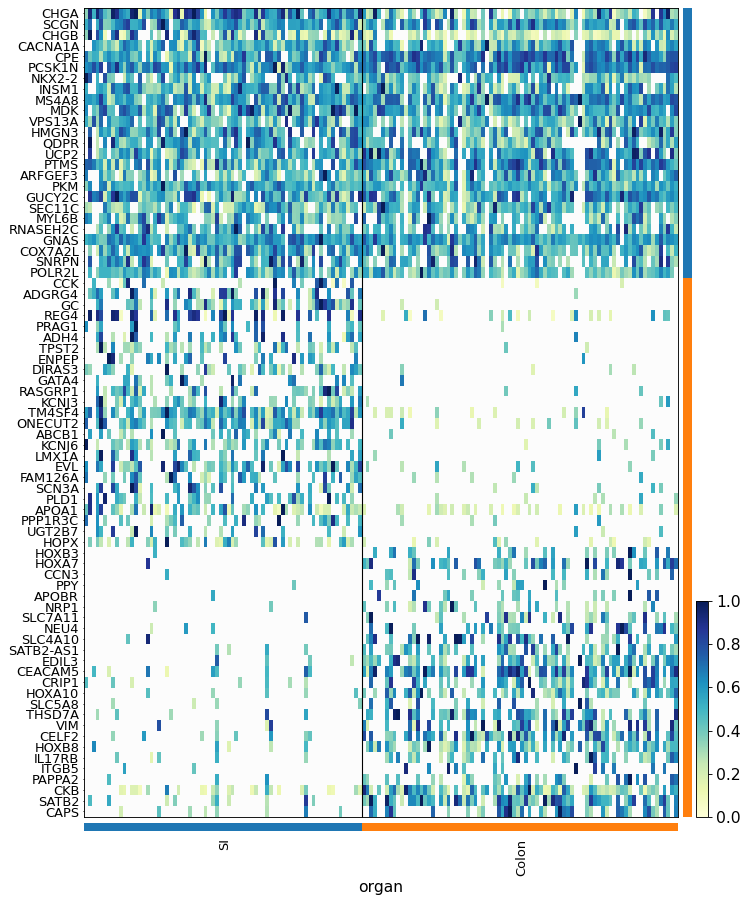

(None,)

In [3]:
###Figure 12A
### EEC heatmap DEGS
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

subset = adata[adata.obs['leiden']=='EEC']

subset.obs.organ.cat.reorder_categories(['SI','Colon'], inplace=True)

EEC2 = {'EEC':['CHGA','SCGN','CHGB','CACNA1A','CPE','PCSK1N','NKX2-2','INSM1','MS4A8','MDK','VPS13A','HMGN3','QDPR','UCP2','PTMS','ARFGEF3','PKM','GUCY2C','SEC11C','MYL6B','RNASEH2C','GNAS','COX7A2L','SNRPN','POLR2L'],
       'SI_EEC2':['CCK','ADGRG4','GC','REG4','PRAG1','ADH4','TPST2','ENPEP','DIRAS3','GATA4','RASGRP1','KCNJ3','TM4SF4','ONECUT2','ABCB1','KCNJ6','LMX1A','EVL','FAM126A','SCN3A','PLD1','APOA1','PPP1R3C','UGT2B7','HOPX'],
        'C_EEC2':['HOXB3','HOXA7','CCN3','PPY','APOBR','NRP1','SLC7A11','NEU4','SLC4A10','SATB2-AS1','EDIL3','CEACAM5','CRIP1','HOXA10','SLC5A8','THSD7A','VIM','CELF2','HOXB8','IL17RB','ITGB5','PAPPA2','CKB','SATB2','CAPS']}
sc.pl.heatmap(subset, EEC2, 'organ', dendrogram=False, standard_scale = 'var', cmap = mp.blues, swap_axes=True, show_gene_labels=True),#save='EEC_DEGs')


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
[]



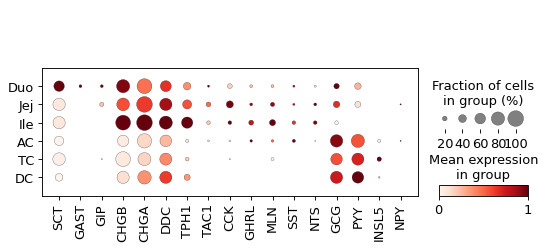

In [4]:
###Figure 12B
#EEC hormone table
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")
subset = adata[adata.obs.lineage.isin(['SI_EEC','C_EEC'])]
subset = mp.scale_adata(subset,groupby='region')

gene_list = mp.filter_genes(adata, [
'SCT','GAST','GIP','CHGB','CHGA','DDC','TPH1','TAC1','CCK','GHRL','MLN','SST','NTS','GCG','PYY','INSL5','NPY'
])

sc.pl.dotplot(subset, var_names=gene_list,groupby = 'region',swap_axes=False,layer = 'raw_scaled')#, save = "EEC_more-hormone_region")

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
['GPR119']



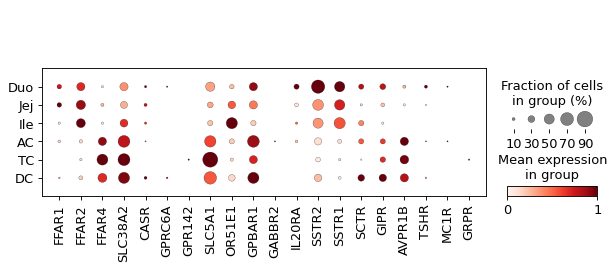

In [5]:
###Figure 12C
###EEC receptors of note table
combined_path = "/proj/magness/CDS010-014-015_combined/"
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")
subset = adata[adata.obs.lineage.isin(['SI_EEC','C_EEC'])]
subset = mp.scale_adata(subset,groupby='region')


gene_list = mp.filter_genes(adata, [
'GPR119','FFAR1','FFAR2','FFAR4','SLC38A2','CASR','GPRC6A','GPR142','SLC5A1','OR51E1','GPBAR1','GABBR2','IL20RA' 
    ,'SSTR2','SSTR1','SCTR','GIPR','AVPR1B','TSHR','MC1R','GRPR'])

sc.pl.dotplot(subset, var_names=gene_list,groupby = 'region',swap_axes=False,layer = 'raw_scaled')#, save = "EEC_receptors_region")

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
[]

The following genes were filtered out:
[]

Determining highly variable genes...
Highly variable genes: 2
Computing neighborhood graph...
Calculating Leiden clusters...
Running UMAP dimensionality reduction...


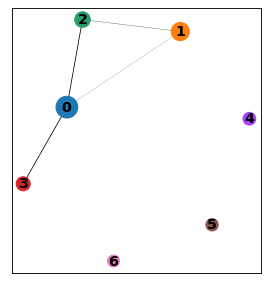

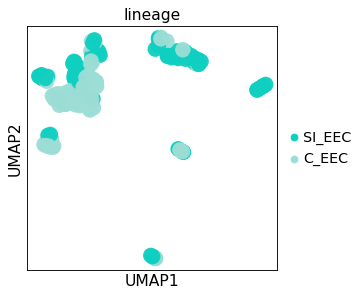

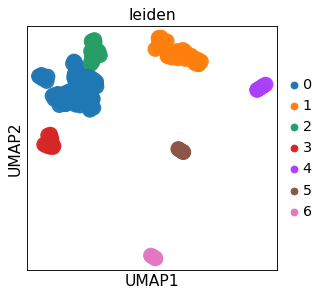

Clustering complete.



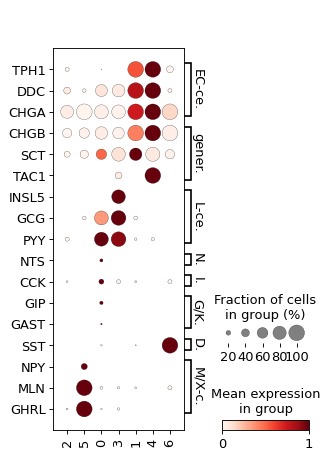

Duodenum


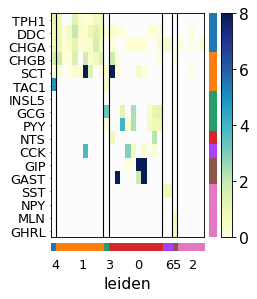

Jejunum


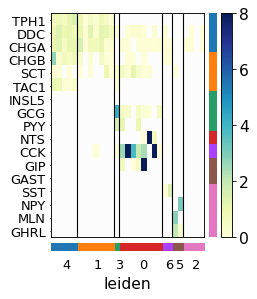

Ileum


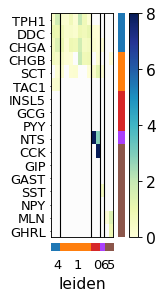

AC


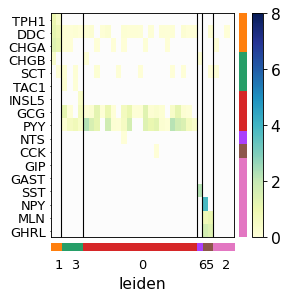

TC


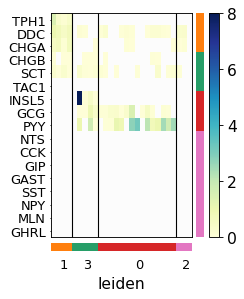

DC


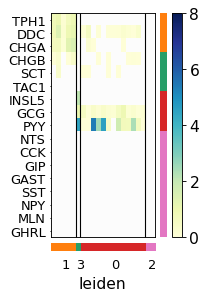

The following genes were filtered out:
['KCTD12', 'SCGN', 'UCN3', 'RAB3C', 'CADPS', 'STXBP5', 'RAB26', 'RAB3B', 'AAK1', 'PCLO', 'PTPRN2', 'DMXL2', 'ATP2B1', 'GHRH', 'SNAP25', 'SLC18A1', 'RAB13']



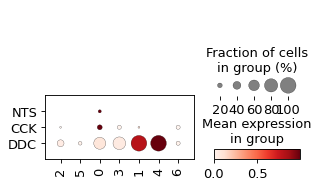

In [6]:
###Figure 12F
###EEC hormone subclustering

adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')

earlyEEC_genes = ['NEUROG3','RYBP','PBX1','TEAD2','CTNND1','CALCOCO1','ZNF281','ADNP','TGIF2','MYCL','RBFOX2',
                  'FOXO6','ZNF664','ZFP2','ATF7IP','SOX4']
intermEEC_genes = ['NEUROD2','PAX4','RCOR2','TOX3','RFX3','TP53INP1','NHLH1','HDAC7','SMARCD2','ZMYM2',
                   'DACH1','ZFP82','HIF1A','TEAD1','MXI1','CBX2','AKNA']
EEC_genesdict = {
    #'progenitors':['SOX4','ATOH1','MUC2'],
    'EC-cells':['TPH1','DDC','CHGA'],
    'general':['CHGB','SCT','TAC1'],
    'L-cells':['INSL5','GCG','PYY'],
    'N-cells':['NTS'],
    'I-cells':['CCK'],
    'G/K-cells':['GIP','GAST'],
    'D-cells':['SST'],
    'M/X-cells':['NPY','MLN','GHRL']
}

EEC_scoresdict = {
    'EC-cells':['DDC','CHGA','TPH1'],
    'L-cells':['GCG','PYY'],
    'G/K-cells':['GIP','GAST'],
    'M/X-cells':['MLN','GHRL']
}

earlyEEC_genes = mp.filter_genes(adata, earlyEEC_genes)
intermEEC_genes = mp.filter_genes(adata, intermEEC_genes)
EEC_genesdict = mp.filter_genes(adata, EEC_genesdict)
EEC_geneslist = [v for v in EEC_genesdict.values()] 
EEC_geneslist = [item for sublist in EEC_geneslist for item in sublist]

EEC_subset = adata[adata.obs.type.isin(['EEC']),adata.var_names.isin(EEC_geneslist)]
raw_subset = EEC_subset.raw.to_adata()
raw_subset = raw_subset[:,raw_subset.var_names.isin(EEC_geneslist)]
del EEC_subset.raw
EEC_subset.raw = raw_subset

num_neighbors = 5
num_pcs = 0
leiden_res = 0.1
kwargs = {'max_iter_harmony':20}

EEC_subset = mp.pipeline.recluster(EEC_subset, save=False, expt_path=combined_path, write_file=None, 
                                   use_raw = False, recalc_pca=False, calc_leiden=True, reembed=True, 
                                   recalc_hvg = True, harmonize=False,  annotate_cell_cycle=False, 
                                   regress_cell_cycle=False, num_pcs=num_pcs, num_neighbors=num_neighbors, 
                                   leiden_res=leiden_res, rescale_data = False, **kwargs)

EEC_subset = mp.scale_adata(EEC_subset, groupby = 'leiden')

sc.pl.dotplot(EEC_subset, EEC_genesdict, groupby = 'leiden', swap_axes = True, layer = 'raw_scaled', 
              categories_order = ['2','5','0','3','1','4','6'])

leiden_order = ['4','1','3','0','6','5','2']

EEC_subset.obs.leiden.cat.reorder_categories(leiden_order, inplace=True)

    
# DUO
print('Duodenum')
subset = EEC_subset[EEC_subset.obs.region=='Duo']
sc.pl.heatmap(subset, EEC_genesdict, groupby = 'leiden', swap_axes = True, cmap=mp.blues,figsize= (2.9,4), layer = 'raw_scaled', vmax=8)#, save='EEC_duo')

# JEJ
print('Jejunum')
subset = EEC_subset[EEC_subset.obs.region=='Jej']
sc.pl.heatmap(subset, EEC_genesdict, groupby = 'leiden', swap_axes = True, cmap=mp.blues,figsize= (2.9,4), layer = 'raw_scaled', vmax=8)#, save='EEC_jej')
                  
# ILE
print('Ileum')
subset = EEC_subset[EEC_subset.obs.region=='Ile']
sc.pl.heatmap(subset, EEC_genesdict, groupby = 'leiden', swap_axes = True, cmap=mp.blues,figsize= (1.4,4), layer = 'raw_scaled', vmax=8)#, save='EEC_ile')

# AC
print('AC')
subset = EEC_subset[EEC_subset.obs.region=='AC']
sc.pl.heatmap(subset, EEC_genesdict, groupby = 'leiden', swap_axes = True, cmap=mp.blues, figsize= (3.4,4), layer = 'raw_scaled', vmax=8)#, save='EEC_AC')

# TC
print('TC')
subset = EEC_subset[EEC_subset.obs.region=='TC']
sc.pl.heatmap(subset, EEC_genesdict, groupby = 'leiden', swap_axes = True, cmap=mp.blues,figsize= (2.7,4), layer = 'raw_scaled', vmax=8)#, save='EEC_TC')
                  
# DC
print('DC')
subset = EEC_subset[EEC_subset.obs.region=='DC']
sc.pl.heatmap(subset, EEC_genesdict, groupby = 'leiden', swap_axes = True, cmap=mp.blues, figsize= (2.1,4), layer = 'raw_scaled', vmax=8)#, save='EEC_DC')

##Figure 12E

presynapse_genes = mp.filter_genes(EEC_subset, ['NTS',	'CCK',	'KCTD12',	'SCGN',	'DDC',	'UCN3',	'RAB3C',	'CADPS',	'STXBP5',	'RAB26',	'RAB3B',	'AAK1',	'PCLO',	'PTPRN2',	'DMXL2',	'ATP2B1',	'GHRH',	'SNAP25',	'SLC18A1',	'RAB13'])

sc.pl.dotplot(EEC_subset, presynapse_genes, groupby = 'leiden', swap_axes = True, layer = 'raw_scaled', 
              categories_order = ['2','5','0','3','1','4','6'])